# Problem Background: The Great Migration

**Year: 3050**

The world as we knew it has changed drastically. After decades of conflict, disease, and a relentless zombie apocalypse, the human race faces extinction. The relentless hordes of the undead have ravaged cities, reduced populations, and devastated the planet's ecosystems. 

In a desperate bid for survival, the remaining factions of humanity have united to embark on a monumental journey to a new home: **Earth Junior**, a distant planet believed to be free from the scourge of the undead. 

As they prepare for this monumental journey, the survival of the human race hinges on their ability to screen potential passengers at the spaceship station. It is crucial that no zombies are allowed to enter the spacecraft, as even a single infected individual could jeopardize the entire mission and the future of humanity.

In this dire situation, you find yourself as the last surviving machine learning engineer, tasked with developing a screening model to predict the zombie-ness of a person. A high human-zombie score would mean the person is likely to be a zombie. The fate of the human race depends on your expertise in machine learning, and you must create a reliable system to ensure the success of this migration to 'Earth Junior'.


# Programming Assignment 2: Task 1 -- Linear Regression  [100 Marks]

### Introduction

In this assignment, you will be implementing Linear Regression and Logistic Regression models for the provided dataset from scratch, and will be familiarizing yourself with the corresponding scikit-learn APIs. A description of the problem statement is given at the start of each part.

After this notebook you should be able to:

- Set up simple regression tasks.

- Understand the working of Linear Regression models and simple data preprocessing.

- Implement Linear Regression models using simple `numpy`.

Have fun!

### Instructions

- Follow along with the notebook, filling out the necessary code where instructed.

- <span style="color: red;">Read the Submission Instructions and Plagiarism Policy in the attached PDF.</span>

- <span style="color: red;">Make sure to run all cells for credit.</span>

- <span style="color: red;">Do not remove any pre-written code.</span> We will be using the `print` statements to grade your assignment.

- <span style="color: red;">You must attempt all parts.</span> Do not assume that because something is for 0 marks, you can leave it - it will definitely be used in later parts.

- <span style="color: red;">Do not use unauthorized libraries.</span> You are not allowed to use `sklearn` in Part A of both tasks. Failure to follow these instructions will result in a serious penalty.

# Human-Zombie Dataset

This dataset simulates human and zombie characteristics based on various lifestyle and physical traits. The dataset contains 1,000 entries, each with features that correlate with a continuous "Human-Zombie Score" ranging from 0 (complete human) to 100 (complete zombie).

This generation of human race has smart-chips embedded in their bloodstream that can keep track of and record all these features.

## Features

- **Height (cm):** The height of the individual measured in centimeters, it decreases with zombie score because zombies are known to shrink in height.

- **Weight (kg):** The weight of the individual measured in kilograms. Zombies tend to have a lower weight because of loss of muscle mass, tissue, organs (and soul??).

- **Screen Time (hrs):** The average number of hours spent in front of screens daily. This feature increases with the human-zombie score, reflecting a more sedentary lifestyle.

- **Junk Food (days/week):** The average number of days per week the individual consumes junk food. This feature also increases with the human-zombie score, indicating poorer dietary habits.

- **Physical Activity (hrs/week):** The total hours spent on physical activities per week. This feature decreases as the human-zombie score increases, suggesting a decline in physical activity.

- **Task Completion (scale):** Scale from 0 to 10 representing how often tasks are completed on time (0 = always on time, 10 = never on time). This score decreases with a higher human-zombie score, indicating declining productivity.

- **Human-Zombie Score:** A continuous score from 0 to 100 representing the degree of "zombie-ness" of the individual, where 0 is fully human and 100 is completely zombie-like.

## Usage

This dataset can be used for various analyses, including regression modeling to predict the human-zombie score based on lifestyle and physical traits.


## Multivariate Linear Regression

In this part, you will implement multivariate linear regression (from scratch) to predict the the human-zombie score during screening before the person can be allowed to enter the spaceship.

To do this, you have the human-zombie-datset.csv containing 1000 examples of the features described above and their scores.

Each one of these input features is stored using a different scale. The features include ranges 0-10, 17-100 and some between 130-200.  This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

A common way to normalize features that use different scales and ranges is:

- Subtract the mean value of each feature from the dataset.

- After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

Note: We only use examples of the train set to estimate the mean and standard deviation.

You have to follow exactly the same steps as above i.e. implement hypothesis, cost function and gradient descent for multivariate linear regression to learn parameters $\theta$ using train set. Finally, report the cost (error) using your learned parameters $\theta$ on test set.

**Note:** Use the slides as a reference to write the gradient descent algorithm from scratch for this problem.

### Part A: Implementation from Scratch (75 Marks)

#### Imports

Start off with importing in the required libraries. Note that you are **only** allowed to use `sklearn`'s train_test_split in this part and no other function from `sklearn`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

#### Preparing Data

Load in your dataset and perform train-test split. Apply preprocessing steps to cater to missing values, categorical variables etc. if necessary. [5 points]

In [2]:
data = pd.read_csv("human_zombie_dataset_v5.csv")
data.head(5)

,Height (cm),Weight (kg),Screen Time (hrs),Junk Food (days/week),Physical Activity (hrs/week),Task Completion (scale),Human-Zombie Score
0,157,41,8.455099,5.622736,4.474819,6.166119,54.881350
1,151,40,8.581430,5.922744,3.749707,1.084877,71.518937
2,166,45,5.018847,5.746557,4.596662,2.030814,60.276338
3,160,75,6.417010,4.634547,4.546153,3.360430,54.488318
4,153,74,4.417465,4.740153,6.601801,5.758603,42.365480


In [3]:
X = data.drop(columns=["Human-Zombie Score"])
y = data["Human-Zombie Score"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of y_test:", Y_test.shape)

Shape of X_train: (800, 6)
Shape of X_test: (200, 6)
Shape of y_train: (800,)
Shape of y_test: (200,)


#### Normalizing Data  [20 marks]

For models like Linear/Logistic Regression, and even for Neural Networks, Standardization/Normalization is a non-negotiable step in the preprocessing stage. You would find your model **broken** if you do not normalize your data.

One nice way to implement this is to create a class, `StandardScaler` that can be used to store the mean and standard deviation of each feature of the training set. The `StandardScaler` class also has two functions, `fit` and `transform`.

- The `fit` function is used to calculate the mean and standard deviation of each feature of the training set. [10 points]

- The `transform` function is used to transform all the features using the corresponding mean and standard deviation, i.e. subtracting the mean and dividing by the standard deviation. [10 points]

A very subtle and important point to note here is that the mean and standard deviation should be calculated only on the training set, and then applied to the test set. This is because in real-world scenarios, we do not have access to the test set, and hence we cannot calculate the mean and standard deviation of the test set.

In [4]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        X = np.asarray(X)
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        self.std = np.where(self.std == 0, 1e-10, self.std)

    def transform(self, X):
        X = np.asarray(X)
        X_scaled = (X - self.mean) / self.std
        return X_scaled

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

scaler = StandardScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


#### Gradient Descent

Now that your data is ready, you can start implementing the gradient descent algorithm. You can use the slides as a reference.

You should be creating a class `LinearRegression`, similar to the design followed for `kNearestNeighbours` in the previous assignment. This means implementing the following methods:

- `__init__`: The constructor of the class. You can initialize any variables, like the learning rate and the number of iterations, here. [5 points]

- `fit`: This method will be used to train your model. It should take in the training data and labels as parameters, and learn the parameters using gradient descent. Save the loss values after every iteration in a list, and return it (for plotting later). [20 points]

- `predict`: This method will be used to predict the labels for a given set of test data. It should take in the test data as a parameter, and return the predicted labels. [10 points]

- `score`: This method will be used to calculate the mean square error for the test data. It should take in the test data and labels as parameters, and return the mean square error. Note that this is a unique case where the loss function and the final reported metric are the same. [10 points]

Plot the cost function, and print your mean square error for both the train and test set. [5 points]

Mean Squared Error on Train Set: 13.342145152369989
Mean Squared Error on Test Set: 12.080376889949669


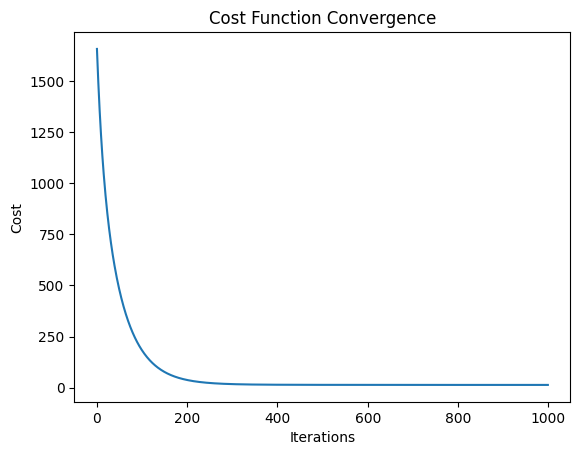

In [5]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6, patience=10):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        losses = []

        best_loss = float('inf')

        for i in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            error = y_predicted - y
            cost = (1 / (2 * n_samples)) * np.dot(error.T, error)

            losses.append(cost)

            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        return losses

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def score(self, X, y):
        predictions = self.predict(X)
        mse = (np.mean((predictions - y) ** 2)) / 2
        return mse

model = LinearRegression(learning_rate=0.01, n_iterations=1000)

loss_history = model.fit(X_train_normalized, Y_train)

y_train_pred = model.predict(X_train_normalized)
y_test_pred = model.predict(X_test_normalized)

train_mse = model.score(X_train_normalized, Y_train)
test_mse = model.score(X_test_normalized, Y_test)

print(f"Mean Squared Error on Train Set: {train_mse}")
print(f"Mean Squared Error on Test Set: {test_mse}")

plt.plot(range(len(loss_history)), loss_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()


### Part B: Regularized Linear Regression Using Scikit-learn (25 Marks)

Now, you'll use the [scikit-learn](https://scikit-learn.org/stable/index.html) to implement [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and apply them to the human-zombie dataset.

Try out different values of regularization coefficient (known as `alpha` in `sklearn`) and use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to report loss with each regression.

Finally, plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$ (y-axis) for Ridge and Lasso. Please read [this blog](https://scienceloft.com/technical/understanding-lasso-and-ridge-regression/) to get better understanding of the desired plots.


#### Importing Libraries

You have to use scikit-learn for this task

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

#### Linear Regression (using `sklearn`)

Use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to find loss and print it. [5 points]

In [7]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_normalized, Y_train)
y_test_pred = lin_reg_model.predict(X_test_normalized)
mse_test = mean_squared_error(Y_test, y_test_pred)/2

print(f"Mean Squared Error for Linear Regression on test set: {mse_test}")

Mean Squared Error for Linear Regression on test set: 12.072050097507997


#### Ridge

Use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to find loss and print it. Also plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$  (y-axis) for Ridge. [5 points + 2.5 for correct plot]

Alpha: 0.01, Mean Squared Error: 12.072014508608481
Alpha: 0.1, Mean Squared Error: 12.071695997345167
Alpha: 1, Mean Squared Error: 12.06868636315695
Alpha: 10, Mean Squared Error: 12.05468733757243
Alpha: 50, Mean Squared Error: 12.242379406141621
Alpha: 100, Mean Squared Error: 12.809090668354907
Alpha: 200, Mean Squared Error: 14.484963778818278


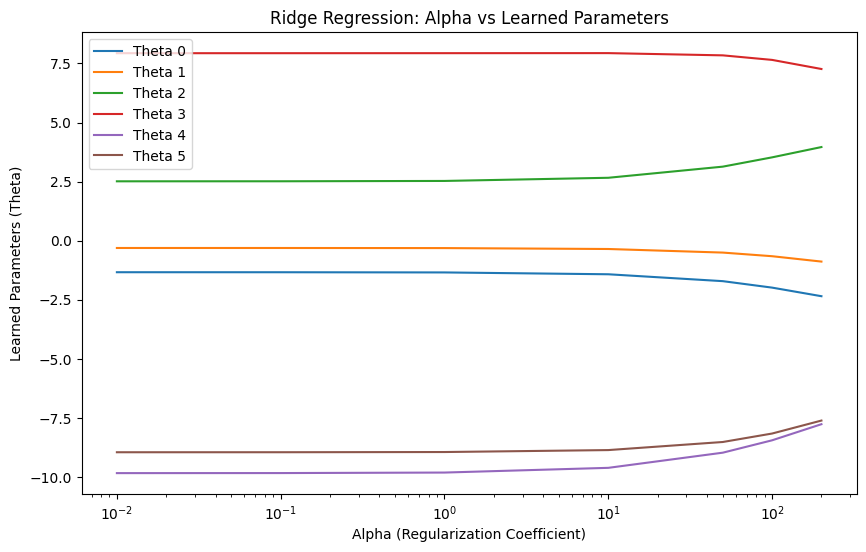

In [8]:
alpha_values = [0.01, 0.1, 1, 10, 50, 100, 200]
mse_values = []
theta_values = []

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_normalized, Y_train)
    Y_test_pred = ridge_model.predict(X_test_normalized)
    mse = mean_squared_error(Y_test, Y_test_pred)/2
    mse_values.append(mse)
    theta_values.append(ridge_model.coef_)
    print(f"Alpha: {alpha}, Mean Squared Error: {mse}")

theta_values = np.array(theta_values)

plt.figure(figsize=(10, 6))
for i in range(theta_values.shape[1]):
    plt.plot(alpha_values, theta_values[:, i], label=f"Theta {i}")

plt.xlabel("Alpha (Regularization Coefficient)")
plt.ylabel("Learned Parameters (Theta)")
plt.title("Ridge Regression: Alpha vs Learned Parameters")
plt.legend()
plt.xscale("log")
plt.show()

#### Lasso

Use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to find loss and print it. Also plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$  (y-axis) for Lasso. [5 points + 2.5 for correct plot]

Alpha: 0.01, Mean Squared Error: 12.073455371022973
Alpha: 0.1, Mean Squared Error: 12.09749121326529
Alpha: 1, Mean Squared Error: 12.834045655001137
Alpha: 10, Mean Squared Error: 62.70665525361716
Alpha: 50, Mean Squared Error: 392.8632951064597
Alpha: 100, Mean Squared Error: 392.8632951064597
Alpha: 200, Mean Squared Error: 392.8632951064597


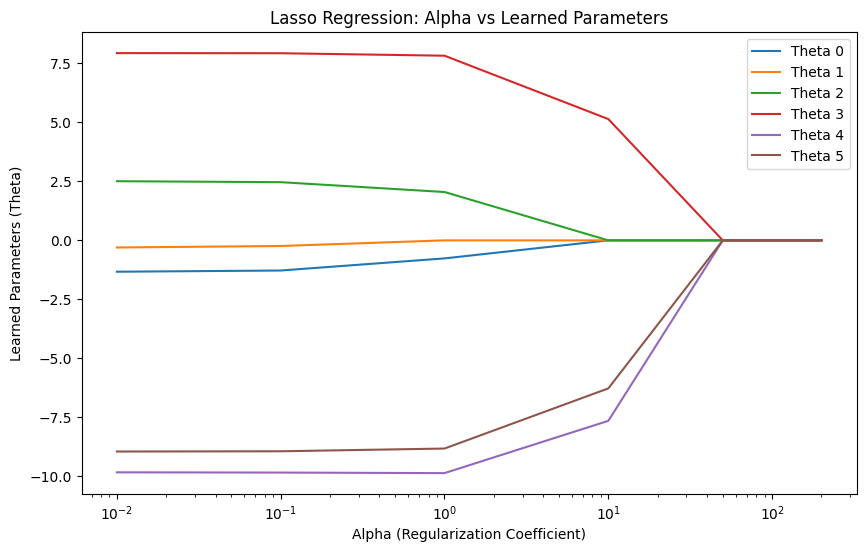

In [9]:
alpha_values = [0.01, 0.1, 1, 10, 50, 100, 200]
mse_values = []
theta_values = []

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train_normalized, Y_train)
    Y_test_pred = lasso_model.predict(X_test_normalized)
    mse = mean_squared_error(Y_test, Y_test_pred)/2
    mse_values.append(mse)
    theta_values.append(lasso_model.coef_)
    
    print(f"Alpha: {alpha}, Mean Squared Error: {mse}")

theta_values = np.array(theta_values)

plt.figure(figsize=(10, 6))
for i in range(theta_values.shape[1]):
    plt.plot(alpha_values, theta_values[:, i], label=f"Theta {i}")

plt.xlabel("Alpha (Regularization Coefficient)")
plt.ylabel("Learned Parameters (Theta)")
plt.title("Lasso Regression: Alpha vs Learned Parameters")
plt.legend()
plt.xscale("log")
plt.show()

#### Elastic Net

Use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to find loss and print it. [5 points]

In [10]:
alpha_values = [0.01, 0.1, 1, 10, 50, 100]
l1_ratio = 0.5
mse_values = []

for alpha in alpha_values:
    elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
    elastic_net_model.fit(X_train_normalized, Y_train)
    Y_test_pred = elastic_net_model.predict(X_test_normalized)
    mse = mean_squared_error(Y_test, Y_test_pred)/2
    mse_values.append(mse)
    
    print(f"Alpha: {alpha}, Mean Squared Error: {mse}")

Alpha: 0.01, Mean Squared Error: 12.061474816557991
Alpha: 0.1, Mean Squared Error: 12.178814427491885
Alpha: 1, Mean Squared Error: 20.1876855460206
Alpha: 10, Mean Squared Error: 170.45837306323136
Alpha: 50, Mean Squared Error: 385.0754667666837
Alpha: 100, Mean Squared Error: 392.8632951064597
